#Time series Analysis Wind Energy production dataset



1.   Load the data
2.   Clean the data set
3.   EDA-Visualization
4.   Model uilding
5.   Conclusions




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the data to orginal_dataframe
WE_DF=pd.read_csv("Turbine_Data.csv");
null_counts = WE_DF.isnull().sum()
print(null_counts)

Unnamed: 0                          0
ActivePower                     16927
AmbientTemperatue               16917
BearingShaftTemperature         47044
Blade1PitchAngle                49349
Blade2PitchAngle                49349
Blade3PitchAngle                49349
ControlBoxTemperature           47043
GearboxBearingTemperature       47044
GearboxOilTemperature           47062
GeneratorRPM                    47078
GeneratorWinding1Temperature    47062
GeneratorWinding2Temperature    47062
HubTemperature                  47043
MainBoxTemperature              47044
NacellePosition                 24077
ReactivePower                   16926
RotorRPM                        47081
TurbineStatus                   47038
WTG                                 0
WindDirection                   24077
WindSpeed                       17190
dtype: int64


In [ ]:
#Data Cleaning
WE_DF.columns = ['Date'] + list(WE_DF.columns[1:])  # Rename the first column to 'Date'
WE_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [ ]:
WE_DF.describe()

In [ ]:
WE_DF.nunique()

Date                            118224
ActivePower                      94084
AmbientTemperatue                93678
BearingShaftTemperature          62286
Blade1PitchAngle                 38946
Blade2PitchAngle                 39021
Blade3PitchAngle                 39021
ControlBoxTemperature                1
GearboxBearingTemperature        62313
GearboxOilTemperature            62412
GeneratorRPM                     61074
GeneratorWinding1Temperature     62406
GeneratorWinding2Temperature     62424
HubTemperature                   38119
MainBoxTemperature               49145
NacellePosition                   6664
ReactivePower                    94040
RotorRPM                         59254
TurbineStatus                      353
WTG                                  1
WindDirection                     6664
WindSpeed                        94224
dtype: int64

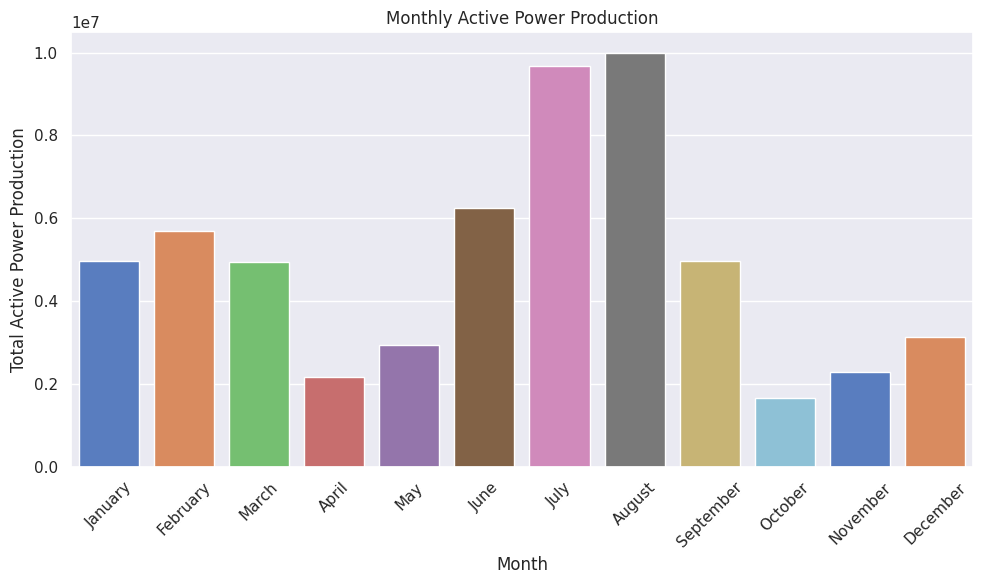

In [ ]:

# Convert 'Date' column to datetime if it's not already in datetime format
WE_DF['Date'] = pd.to_datetime(WE_DF['Date'])

# Extract month from the 'Date' column
WE_DF['Month'] = WE_DF['Date'].dt.month_name()

# Group by month and sum the 'ActivePower'
monthly_power_production = WE_DF.groupby('Month')['ActivePower'].sum().reset_index()

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'Month' to categorical with defined order
monthly_power_production['Month'] = pd.Categorical(
    monthly_power_production['Month'], categories=month_order, ordered=True
)

# Sort the DataFrame based on the categorical 'Month' order
monthly_power_production = monthly_power_production.sort_values('Month')

# Plotting using Seaborn with ordered months
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='Month', y='ActivePower', data=monthly_power_production, palette='muted')
plt.ylabel('Total Active Power Production')
plt.xlabel('Month')
plt.title('Monthly Active Power Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

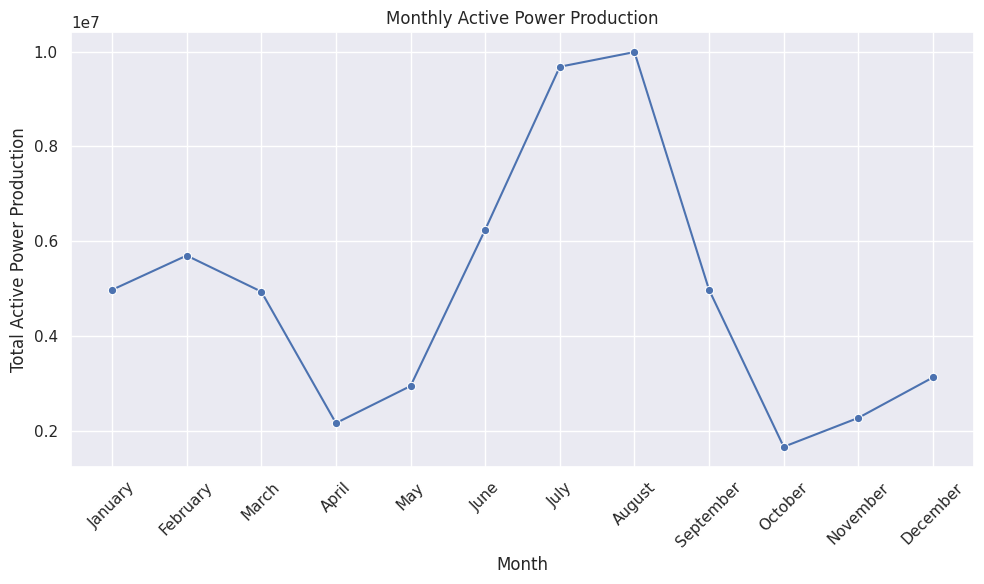

In [ ]:

WE_DF['Date'] = pd.to_datetime(WE_DF['Date'])

# Extract month from the 'Date' column
WE_DF['Month'] = WE_DF['Date'].dt.month_name()

# Group by month and sum the 'ActivePower'
monthly_power_production = WE_DF.groupby('Month')['ActivePower'].sum().reset_index()

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'Month' to categorical with defined order
monthly_power_production['Month'] = pd.Categorical(
    monthly_power_production['Month'], categories=month_order, ordered=True
)

# Sort the DataFrame based on the categorical 'Month' order
monthly_power_production = monthly_power_production.sort_values('Month')

# Plotting using Seaborn with ordered months in a line graph
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x='Month', y='ActivePower', data=monthly_power_production, marker='o')
plt.ylabel('Total Active Power Production')
plt.xlabel('Month')
plt.title('Monthly Active Power Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

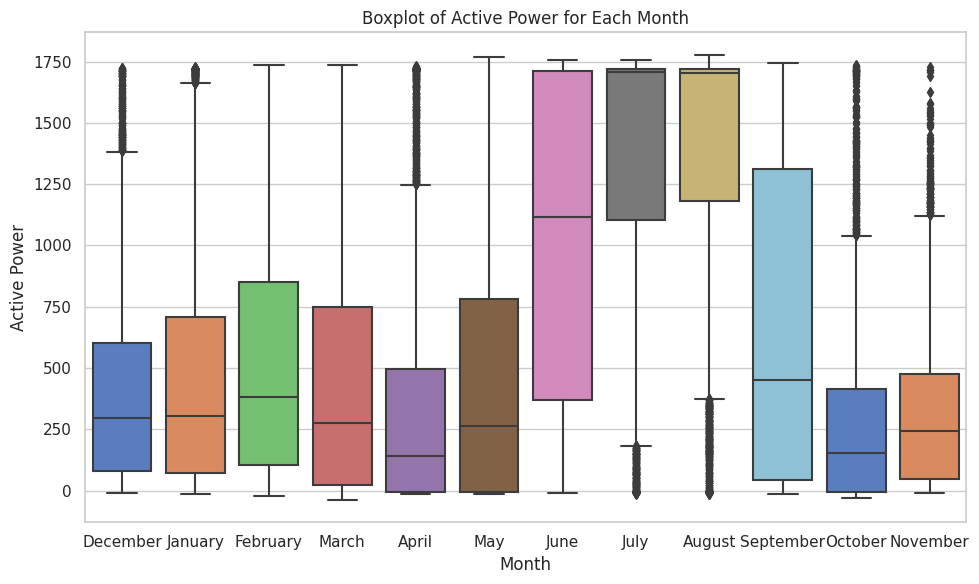

In [ ]:
# Convert 'Date' column to datetime if it's not already in datetime format
WE_DF['Date'] = pd.to_datetime(WE_DF['Date'])

# Extract month from the 'Date' column
WE_DF['Month'] = WE_DF['Date'].dt.month_name()

# Plotting boxplots for each month using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x='Month', y='ActivePower', data=WE_DF, palette='muted')
plt.xlabel('Month')
plt.ylabel('Active Power')
plt.title('Boxplot of Active Power for Each Month')
plt.tight_layout()
plt.show()

In [ ]:
#Filtering rows with postive power generation values
WE_DF =  WE_DF[WE_DF['ActivePower']>=0]

In [ ]:
WE_DF.nunique()

Date                            79106
ActivePower                     78449
AmbientTemperatue               77943
BearingShaftTemperature         52091
Blade1PitchAngle                33383
Blade2PitchAngle                33431
Blade3PitchAngle                33431
ControlBoxTemperature               1
GearboxBearingTemperature       52099
GearboxOilTemperature           52171
GeneratorRPM                    51730
GeneratorWinding1Temperature    52188
GeneratorWinding2Temperature    52191
HubTemperature                  31207
MainBoxTemperature              41376
NacellePosition                  4990
ReactivePower                   78413
RotorRPM                        51641
TurbineStatus                     121
WTG                                 1
WindDirection                    4990
WindSpeed                       78497
Month                              12
dtype: int64

In [ ]:
# drop columns with constant values
WE_DF = WE_DF.drop(['WTG', 'ControlBoxTemperature'], axis=1)
WE_DF.nunique()

Date                            79106
ActivePower                     78449
AmbientTemperatue               77943
BearingShaftTemperature         52091
Blade1PitchAngle                33383
Blade2PitchAngle                33431
Blade3PitchAngle                33431
GearboxBearingTemperature       52099
GearboxOilTemperature           52171
GeneratorRPM                    51730
GeneratorWinding1Temperature    52188
GeneratorWinding2Temperature    52191
HubTemperature                  31207
MainBoxTemperature              41376
NacellePosition                  4990
ReactivePower                   78413
RotorRPM                        51641
TurbineStatus                     121
WindDirection                    4990
WindSpeed                       78497
Month                              12
dtype: int64

In [ ]:
WE_DF.isnull().sum()

Date                                0
ActivePower                         0
AmbientTemperatue                1032
BearingShaftTemperature         26932
Blade1PitchAngle                43397
Blade2PitchAngle                43480
Blade3PitchAngle                43480
GearboxBearingTemperature       26930
GearboxOilTemperature           26915
GeneratorRPM                    26919
GeneratorWinding1Temperature    26901
GeneratorWinding2Temperature    26894
HubTemperature                  27041
MainBoxTemperature              26952
NacellePosition                 20429
ReactivePower                      42
RotorRPM                        26925
TurbineStatus                   26577
WindDirection                   20429
WindSpeed                         308
Month                               0
dtype: int64

In [ ]:
# forward fill
#backward fill
WE_DF = WE_DF.fillna(WE_DF.median())
WE_DF.isnull().sum()


<ipython-input-18-1e1301470c08>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  WE_DF = WE_DF.fillna(WE_DF.median())
<ipython-input-18-1e1301470c08>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  WE_DF = WE_DF.fillna(WE_DF.median())


Date                            0
ActivePower                     0
AmbientTemperatue               0
BearingShaftTemperature         0
Blade1PitchAngle                0
Blade2PitchAngle                0
Blade3PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorRPM                    0
GeneratorWinding1Temperature    0
GeneratorWinding2Temperature    0
HubTemperature                  0
MainBoxTemperature              0
NacellePosition                 0
ReactivePower                   0
RotorRPM                        0
TurbineStatus                   0
WindDirection                   0
WindSpeed                       0
Month                           0
dtype: int64

<Axes: xlabel='Date'>

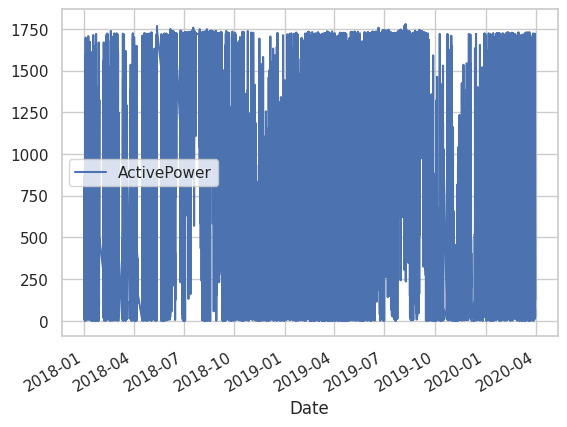

In [ ]:
# plot 'ActivePower' for the dates
WE_DF.reset_index().plot(x = 'Date', y = 'ActivePower')

<ipython-input-22-1042cad23e1e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  WE_DF_resampled = WE_DF.resample("D").mean()


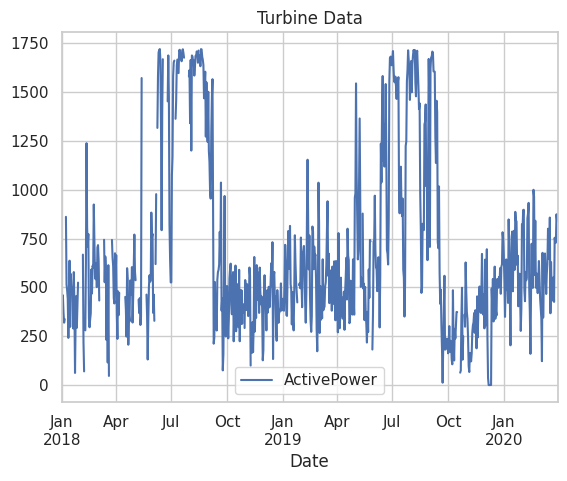

In [ ]:
# Assuming 'Date' column exists in your DataFrame and it's not in datetime format
WE_DF['Date'] = pd.to_datetime(WE_DF['Date'])  # Convert 'Date' column to datetime if not already

# Set 'Date' column as the index
WE_DF.set_index('Date', inplace=True)

# Resample the data on daily frequency and take the mean of each day
WE_DF_resampled = WE_DF.resample("D").mean()

# Resetting index for plotting
WE_DF_resampled.reset_index().plot(x="Date", y='ActivePower')
plt.legend(loc='best')
plt.title('Turbine Data')
plt.show()


<ipython-input-28-39633a3afe2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(WE_DF.corr(), annot=True, annot_kws={"size": 5},cmap='coolwarm')  # Adjust the font size


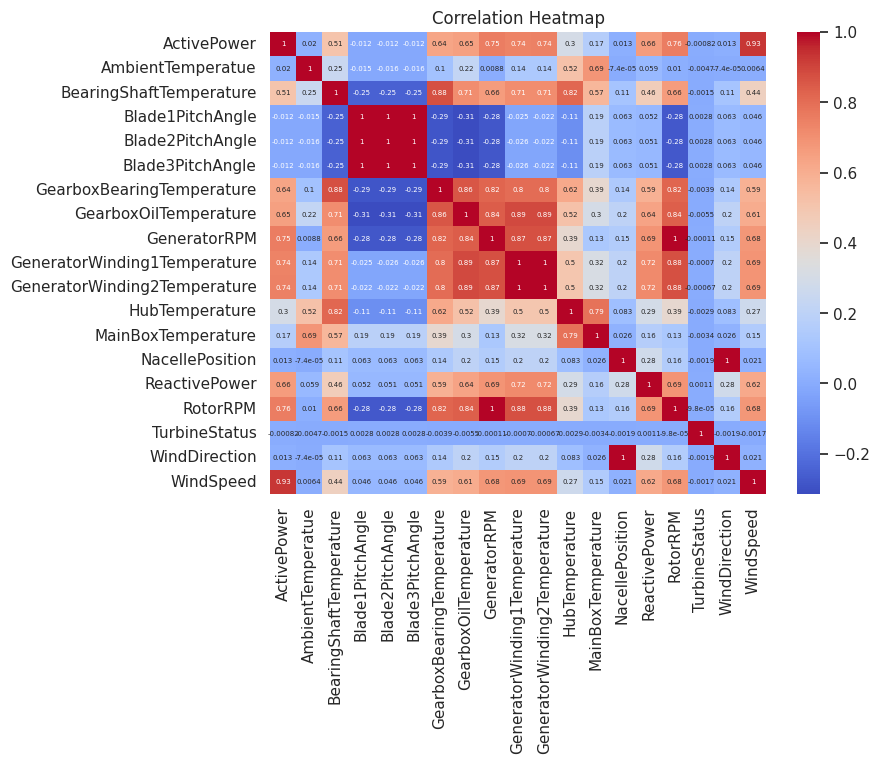

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(WE_DF.corr(), annot=True, annot_kws={"size": 5},cmap='coolwarm')  # Adjust the font size
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# dropping columns with low coeffecient
WE_DF = WE_DF.drop(['AmbientTemperatue', 'TurbineStatus', 'WindDirection', 'NacellePosition', 'MainBoxTemperature','HubTemperature','Blade3PitchAngle','Blade2PitchAngle', 'Blade1PitchAngle'], axis=1)

In [ ]:
sns.pairplot(WE_DF, hue='ActivePower', diag_kind='hist')
plt.show()